# konlpy

In [ ]:
Preprocessing => tokenizing => sentence(의미를 가지는 단위) => tokens(word, regexp, tweet, tokenizer)
                                                            split(기호) + P, MA(형태소 분석기 konlpy)

In [4]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt # 껍데기만 파이썬이고, 실제는 JAVA에서 돌아간다.

In [5]:
# core
# Java - Jpype - api/Python

In [6]:
han = Hannanum()
kkm = Kkma()
kom = Komoran()
okt = Okt()

OpenJDK 64-Bit Server VM warning: Attempt to protect stack guard pages failed.
OpenJDK 64-Bit Server VM warning: Attempt to deallocate stack guard pages failed.


In [10]:
han.tagset.__len__(), kkm.tagset.__len__(), kom.tagset.__len__(), okt.tagset.__len__(), 

(29, 67, 45, 19)

In [14]:
# 형태소 분석기 다 특징이 다르다.

In [20]:
import nltk
nltk.download('tagsets')
from nltk.tokenize import treebank
from nltk.tag import pos_tag
from nltk.help import upenn_tagset

[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/myoungjikim/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [21]:
upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [22]:
from nltk.corpus import gutenberg
emma = gutenberg.open(gutenberg.fileids()[0]).read()

In [31]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

t1 = Text(word_tokenize(emma))
tokenizer = treebank.TreebankWordDetokenizer()     # 뭐가 이렇구나 라는 걸까?
t2 = Text(tokenizer.tokenize(emma)) 

In [32]:
list(zip(t1.vocab().most_common(20), t2.vocab().most_common(20)))

[((',', 12016), (' ', 1017134)),
 (('.', 6355), ('e', 84518)),
 (('to', 5125), ('t', 58069)),
 (('the', 4844), ('a', 53669)),
 (('and', 4653), ('o', 52893)),
 (('of', 4272), ('n', 46986)),
 (('I', 3177), ('i', 42590)),
 (('--', 3100), ('s', 41555)),
 (('a', 3001), ('h', 40828)),
 (("''", 2452), ('r', 40698)),
 (('was', 2383), ('d', 28328)),
 (('her', 2360), ('l', 27539)),
 ((';', 2353), ('u', 20605)),
 (('not', 2242), ('m', 17909)),
 (('in', 2103), ('\n', 16822)),
 (('it', 2103), ('y', 15267)),
 (('be', 1965), ('w', 14935)),
 (('she', 1774), ('c', 14815)),
 (('``', 1735), ('f', 14598)),
 (('that', 1729), ('g', 13525))]

In [33]:
# 우리나라 말에서는 명사가 중요하다.
data='아버지가방에들어가신다.'

In [34]:
han.pos(data)  # 최장일치, 최단일치 ? 

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E'), ('.', 'S')]

In [35]:
kkm.pos(data)

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [36]:
kom.pos(data)

[('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EF'),
 ('.', 'SF')]

In [37]:
okt.pos(data)    

[('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
# mecab 추천, 도커 사용해라. 리눅스에서 돌아간다. -> 왜 한국어가 되는가? 

In [38]:
# 명가는 의미파악에 중요하기 때문에, 따로 추출하는 기능이 있다.

In [40]:
han.pos('알잘딱깔센')

[('알잘딱깔센', 'N')]

In [41]:
kkm.pos('알잘딱깔센')

[('알', 'NNG'),
 ('잘', 'MAG'),
 ('딱', 'MAG'),
 ('깔', 'VV'),
 ('ㄹ', 'ETD'),
 ('세', 'VV'),
 ('ㄴ', 'ETD')]

In [42]:
kom.pos('알잘딱깔센')   #pos가 무엇의 줄임말인가? -> 

[('알', 'NNG'),
 ('잘', 'MAG'),
 ('딱', 'MAG'),
 ('깔', 'VV'),
 ('ㄹ', 'ETM'),
 ('센', 'NNP')]

In [43]:
okt.pos('알잘딱깔센')

[('알잘', 'Verb'), ('딱', 'VerbPrefix'), ('깔', 'Verb'), ('센', 'Verb')]

In [ ]:
# corpus는 시대상을 반영한다. 그래서 시대에 사용하는 언어 자료들을 사용하여 만든다. 
# 말뭉치는 여러 상황을 담을 수 있게끔 언어 자료를 잘 모아야 한다.
# 띄어쓰기가 잘 안되어 있어서 분석하기 어려울 수있다     -> 맞춤법 검사기를 돌려서 사용할 순 없나? 

# 자연어의 특징

In [45]:
# Zipf's Law

In [51]:
t2.vocab().most_common(50)

[(' ', 1017134),
 ('e', 84518),
 ('t', 58069),
 ('a', 53669),
 ('o', 52893),
 ('n', 46986),
 ('i', 42590),
 ('s', 41555),
 ('h', 40828),
 ('r', 40698),
 ('d', 28328),
 ('l', 27539),
 ('u', 20605),
 ('m', 17909),
 ('\n', 16822),
 ('y', 15267),
 ('w', 14935),
 ('c', 14815),
 ('f', 14598),
 ('g', 13525),
 (',', 12018),
 ('b', 10533),
 ('p', 10284),
 ('.', 8882),
 ('v', 7645),
 ('-', 6774),
 ('k', 4351),
 ('"', 4187),
 ('I', 4016),
 ('M', 2796),
 (';', 2353),
 ('H', 1740),
 ('E', 1503),
 ('W', 1355),
 ('x', 1346),
 ('T', 1132),
 ("'", 1116),
 ('!', 1063),
 ('S', 953),
 ('q', 895),
 ('_', 741),
 ('A', 710),
 ('j', 688),
 ('C', 647),
 ('?', 621),
 ('B', 598),
 ('F', 542),
 ('Y', 439),
 ('J', 433),
 ('K', 412)]

In [47]:
import matplotlib.pylab as plt

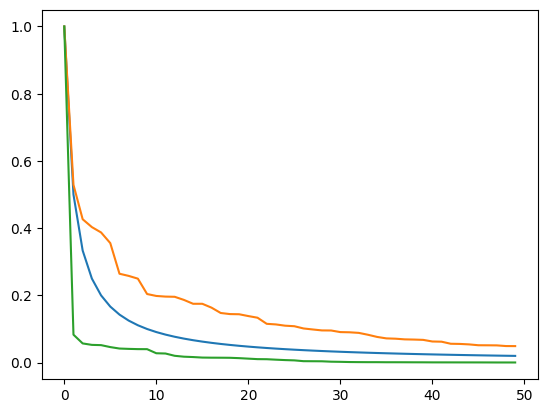

In [52]:
plt.plot([1/i for i in range(1,51)])
plt.plot([r[1]/12016 for r in t1.vocab().most_common(50) ])  # 왜 12016으로 나누지? 
plt.plot([r[1]/1017134 for r in t2.vocab().most_common(50) ])

In [55]:
from konlpy.corpus import kolaw, kobill

In [57]:
law = kolaw.open(kolaw.fileids()[0]).read() 

In [72]:
from nltk.tokenize import regexp_tokenize
from nltk.tag import pos_tag  # part of speech tagging
nltk.download('averaged_perceptron_tagger')

kt1 = Text(law.split())
kt2 = Text(word_tokenize(law))
kt3 = Text(regexp_tokenize(law,r'\b\w+\b'))
kt4 = Text(pos_tag(word_tokenize(law)))
kt5 = Text(han.morphs(law))
kt6 = Text(kkm.morphs(law))
kt7 = Text(kom.morphs(law))
kt8 = Text(okt.morphs(law))
kt9 = Text(han.pos(law))
kt10 = Text(kkm.pos(law))
kt11 = Text(kom.pos(law))
kt12 = Text(okt.pos(law))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/myoungjikim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [205]:
kt1.vocab()


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

FreqDist({'수': 87, '①': 75, '또는': 70, '의하여': 66, '법률이': 57, '있다.': 57, '한다.': 56, '정하는': 50, '그': 44, '때에는': 42, ...})

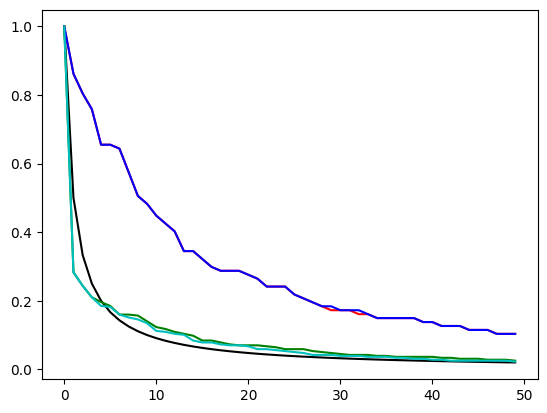

In [76]:
n = 50
plt.plot([1/i for i in range(1,n+1)], c='k')
plt.plot([r[1]/kt1.count(kt1.vocab().max()) for r in kt1.vocab().most_common(n)],c='r')
plt.plot([r[1]/kt2.count(kt2.vocab().max()) for r in kt2.vocab().most_common(n)],c='g')
plt.plot([r[1]/kt3.count(kt3.vocab().max()) for r in kt3.vocab().most_common(n)],c='b')
plt.plot([r[1]/kt4.count(kt4.vocab().max()) for r in kt4.vocab().most_common(n)],c='c')

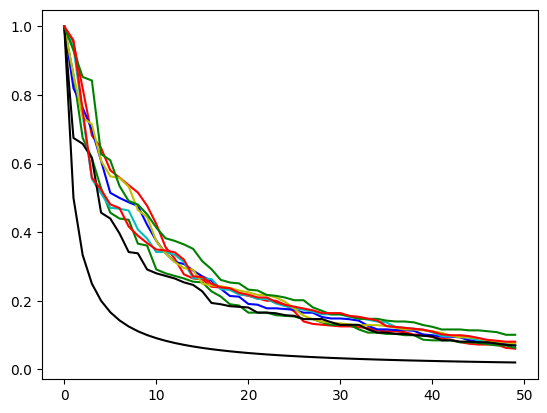

In [87]:
n = 50
plt.plot([1/i for i in range(1,n+1)], c='k')
plt.plot([r[1]/kt5.count(kt5.vocab().max()) for r in kt5.vocab().most_common(n)],c='r')
plt.plot([r[1]/kt6.count(kt6.vocab().max()) for r in kt6.vocab().most_common(n)],c='g')
plt.plot([r[1]/kt7.count(kt7.vocab().max()) for r in kt7.vocab().most_common(n)],c='b')
plt.plot([r[1]/kt8.count(kt8.vocab().max()) for r in kt8.vocab().most_common(n)],c='c')
plt.plot([r[1]/kt9.count(kt9.vocab().max()) for r in kt9.vocab().most_common(n)],c='y')
plt.plot([r[1]/kt10.count(kt10.vocab().max()) for r in kt10.vocab().most_common(n)],c='k')
plt.plot([r[1]/kt11.count(kt11.vocab().max()) for r in kt11.vocab().most_common(n)],c='g')
plt.plot([r[1]/kt12.count(kt12.vocab().max()) for r in kt12.vocab().most_common(n)],c='r')

In [63]:
# 한글로된 zipf's law

In [86]:
[ kt6.vocab().most_common(10), kt10.vocab().most_common(10)] 

[[('의', 532),
  ('하', 457),
  ('.', 359),
  ('에', 328),
  ('는', 281),
  ('ㄴ다', 243),
  ('ㄴ', 234),
  ('을', 232),
  ('은', 195),
  ('이', 192)],
 [(('의', 'JKG'), 532),
  (('.', 'SF'), 359),
  (('하', 'XSV'), 350),
  (('에', 'JKM'), 328),
  (('ㄴ다', 'EFN'), 243),
  (('ㄴ', 'ETD'), 234),
  (('을', 'JKO'), 211),
  (('은', 'JX'), 182),
  (('는', 'JX'), 180),
  (('저', 'NP'), 155)]]

### zip's law에 적용되는지 관측해봄으로써, 내가 사용하는 형태소분석기가 적절한지, 데이터 셋이 믿을만한지를 판단할 수 있다.
### 자연어의 특징: 상위 50개의 단어가 대부분의 문장과 대화들로 구성된다.

# 전처리

In [89]:
t1.vocab().N(), t1.vocab().B()

(191785, 8406)

In [94]:
# 상위 50개의 빈도와 비율을 출력, 단어들을 보면 사실 불용어가 많다.
n = 10
s1 = 0.0 # 빈도 누적
s2 = 0.0 # 비율 누적
for r in t1.vocab().most_common(50):
    s1 += r[1]
    s2 += r[1]/t1.vocab().N()
    print(r[0], r[1]/t1.vocab().N(), t1.vocab().freq(r[0]))

s1,s2 

, 0.06265349219177725 0.06265349219177725
. 0.03313606382146675 0.03313606382146675
to 0.026722632114086087 0.026722632114086087
the 0.025257449748416195 0.025257449748416195
and 0.024261542873530256 0.024261542873530256
of 0.022274943295878195 0.022274943295878195
I 0.016565424824673464 0.016565424824673464
-- 0.016163933571447194 0.016163933571447194
a 0.015647730531584848 0.015647730531584848
'' 0.012785150037802747 0.012785150037802747
was 0.012425372161535051 0.012425372161535051
her 0.012305446202779154 0.012305446202779154
; 0.012268946997940402 0.012268946997940402
not 0.011690173892640196 0.011690173892640196
in 0.010965403967984982 0.010965403967984982
it 0.010965403967984982 0.010965403967984982
be 0.010245848215449592 0.010245848215449592
she 0.009249941340563651 0.009249941340563651
`` 0.009046588627890607 0.009046588627890607
that 0.009015303595171676 0.009015303595171676
you 0.008676382407383268 0.008676382407383268
had 0.00836874625231379 0.00836874625231379
as 0.007232

(98964.0, 0.5160153296660321)

In [95]:
# 상위 50개의 빈도와 비율을 출력, 단어들을 보면 사실 불용어가 많다.
n = 30
s1 = 0.0 # 빈도 누적
s2 = 0.0 # 비율 누적
for r in kt6.vocab().most_common(n):
    s1 += r[1]
    s2 += r[1]/t1.vocab().N()
    print(r[0], r[1]/t1.vocab().N(), t1.vocab().freq(r[0]))  # 단어, 단어수/전체수(이 단어가 전체글에서 나타난 비율)

s1,s2 

의 0.0027739395677451313 0.0
하 0.0023828766587585056 0.0
. 0.0018718877910159815 0.03313606382146675
에 0.0017102484553015095 0.0
는 0.0014651823656698908 0.0
ㄴ다 0.001267043825116667 0.0
ㄴ 0.001220116276038272 0.0
을 0.0012096879317986286 0.0
은 0.0010167635633652266 0.0
이 0.0010011210470057617 0.0
저 0.0008081966785723597 0.0
여 0.0007769116458534296 0.0
· 0.0007560549573741429 0.0
ㄹ 0.0007351982688948562 0.0
조 0.0007091274082957478 0.0
를 0.0007039132361759262 0.0
법률 0.0006309148264984228 0.0
되 0.0005892014495398493 0.0
, 0.0005266313841019892 0.06265349219177725
있 0.0005162030398623459 0.0
다 0.0004588471465443074 0.0
정하 0.0004588471465443074 0.0
수 0.0004588471465443074 0.0
대통령 0.00043799045806502073 0.0
의하 0.00043277628594519906 0.0
과 0.0004275621138253774 0.0
① 0.0004067054253460907 0.0
② 0.0004067054253460907 0.0
국가 0.0003806345647469823 0.0
헌법 0.0003597778762676956 0.0


(5159.0, 0.02689991396616002)

In [96]:
kt6.vocab().N(), kt6.vocab().B() 

(10053, 1247)

In [121]:
n = 8406
s1 = 0.0 # 빈도 누적
s2 = 0.0 # 비율 누적
for r in t1.vocab().most_common()[::-1][:n]:
    s1 += r[1]
    s2 += r[1]/t1.vocab().N()
    # print(r[0], r[1]/t1.vocab().N(), t1.vocab().freq(r[0]))  # 단어, 단어수/전체수(이 단어가 전체글에서 나타난 비율)

s1,s2   # 전체 단어수, 비율 누적

(191785.0, 1.0000000000000047)

In [122]:
n = 800
s1 = 0.0 # 빈도 누적
s2 = 0.0 # 비율 누적
# 가장 빈도수가 높은
for r in kt6.vocab().most_common(n)[::-1][:n]:
    s1 += r[1]
    s2 += r[1]/t1.vocab().N()
    # print(r[0], r[1]/t1.vocab().N(), t1.vocab().freq(r[0]))  # 단어, 단어수/전체수(이 단어가 전체글에서 나타난 비율)

s1,s2   # 전체 단어수, 비율 누적

(961.0, 0.00501081940714871)

In [128]:
threshold = .3

s = 0.0
mfw = list()
mrw = list()

for r in kt6.vocab().most_common():   # 고빈도 단어 자르기
    s += kt6.vocab().freq(r[0])

    if s > threshold:
        break

    mfw.append(r[0])

s = 0.0
for r in kt6.vocab().most_common()[::-1]:   # 저빈도 단어 자르기
    s += kt6.vocab().freq(r[0])

    if s > threshold:
        break

    mrw.append(r[0])

len(mfw), len(mrw), 1247


(9, 1156, 1247)

In [127]:
1247 - (9+1156)

82

In [129]:
list(set(kt6.tokens) - set(mfw) - set(mrw)) 

['②',
 ',',
 '선거',
 '의무',
 '제',
 '임기',
 'ㄹ',
 '있',
 '가지',
 '사항',
 '대통령',
 '여야',
 '직무',
 '바',
 '정하',
 '이상',
 '으로',
 '조직',
 '때',
 '국가',
 '가',
 '대하',
 '그',
 '임명',
 '로',
 '·',
 '경제',
 '국민',
 '여',
 '위원',
 '①',
 '관하',
 '거나',
 '아니하',
 '1',
 '와',
 '의하',
 '3',
 '국무',
 '지',
 '며',
 '고',
 '이',
 '의원',
 '기타',
 '모든',
 '권리',
 '조',
 '에서',
 '법원',
 '를',
 '의결',
 '저',
 '2',
 '수',
 '필요',
 '어야',
 '또는',
 '헌법',
 '없',
 '및',
 '경우',
 '국',
 '공무원',
 '③',
 '되',
 '회의',
 '항',
 '얻',
 '과',
 '일',
 '정부',
 '국회',
 '보장',
 '자유',
 '국회의원',
 '기',
 '위하',
 '법률',
 '④',
 '받',
 '다']

In [130]:
k = 10, 100
b = .4, .6

In [136]:
heaps = []
heaps.append(Text(word_tokenize(gutenberg.open(gutenberg.fileids()[0]).read())).vocab())
for file in gutenberg.fileids()[1:]:
    corpus = gutenberg.open(file).read()
    heaps.append(heaps[-1] + Text(word_tokenize(corpus)).vocab())

In [138]:
len(heaps), heaps[0].N(), heaps[-1].N(), heaps[0].B(), heaps[-1].B(),

(18, 191785, 2538838, 8406, 61835)

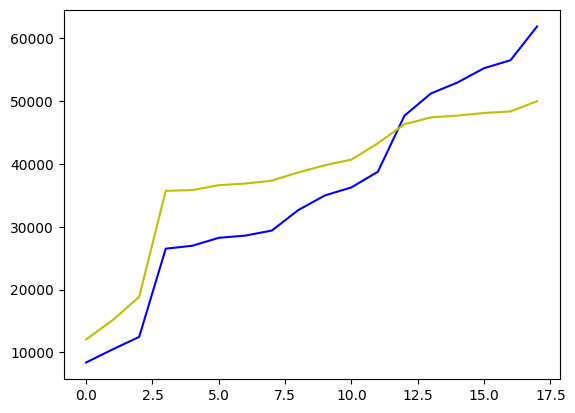

In [147]:
k = 15
b = .55
plt.plot([h.B() for h in heaps],c='b')
plt.plot([k*h.N()**b for h in heaps],c='y')

In [148]:
# 데이터를 아무리 수집해도 단어의 최대 수는 8000개 아래

In [149]:
(k*1000000**b) * .07

2095.025430717325

In [150]:
(9+1156)/1247

0.9342421812349639

In [ ]:
k = 10, 100 # 이게 뭐였지?
b = .4, .6  # 이게 뭐였지? 

In [151]:
heaps = []
heaps.append(Text(kkm.morphs(kobill.open(kobill.fileids()[0]).read())).vocab())
for file in kobill.fileids()[1:]:
    corpus = kobill.open(file).read()
    heaps.append(heaps[-1] + Text(kkm.morphs(corpus)).vocab())

In [152]:
heaps[-1].N(), (k*heaps[-1].N()**b) * .07

(21686, 254.73463536595145)

In [ ]:
# 이걸 잘 이해하면 모델의 사이즈를 예상 할 수 있다.
# 오늘 배운 경험적인 법칙들을 꼭 기억하자. 


# Ngram
## N개의 token으로 구성된 시퀀스 freq(A,B,C...) => P(A,B,C...) => 결합확률
                            P(?|A,B) = P(A,B.?)/P(A,B)
                                     = freq(A,B,?)/N  / freq(A,B)/N
                                     = freq(A,B,?) / freq(A,B)
## 가장 간단한, 통계를 기반으로 하는 자연어 처리 모델

In [155]:
def ngram(s,n=2,t=True):  #음절이냐, 어절이냐의 차이로 해본다.  # t=True; 어절  t=False; 음절
    result  = []
    if not t:
        s = list(s)

    for i in range(len(s)-(n-1)):
        result.append(''.join(s[i:i+n]))
        
    return result

In [156]:
ngram('아버지가방에들어가신다.',t=False)  # 음절

['아버', '버지', '지가', '가방', '방에', '에들', '들어', '어가', '가신', '신다', '다.']

In [158]:
ngram('아버지가 방에 들어가신다.'.split())  # 어절

['아버지가방에', '방에들어가신다.']

In [164]:
tokens = kkm.morphs(law)

In [162]:
bigram = Text(ngram(tokens))

In [165]:
unigram = Text(ngram(tokens, n=1))

In [176]:
# NLU
seed = '대통령'
s = 0.0
c = 0
seed_tokens = list(set(filter(lambda t:t.startswith(seed), bigram.tokens)))
for t in seed_tokens:
    s += bigram.count(t)/unigram.count(seed)
    c += bigram.count(t)
    print(t,bigram.count(t), bigram.count(t)/unigram.count(seed))

unigram.count(seed), c, s

대통령으로서 1 0.011904761904761904
대통령후보자 1 0.011904761904761904
대통령또는 1 0.011904761904761904
대통령소속하 1 0.011904761904761904
대통령으로 2 0.023809523809523808
대통령은 28 0.3333333333333333
대통령이 21 0.25
대통령제 1 0.011904761904761904
대통령령을 1 0.011904761904761904
대통령령의 1 0.011904761904761904
대통령과 1 0.011904761904761904
대통령및 1 0.011904761904761904
대통령에 2 0.023809523809523808
대통령의 14 0.16666666666666666
대통령선거 1 0.011904761904761904
대통령에게 2 0.023809523809523808
대통령령안 1 0.011904761904761904
대통령을 3 0.03571428571428571
대통령당선자 1 0.011904761904761904
대통령· 3 0.03571428571428571


(84, 87, 1.0357142857142854)

In [177]:
# NLU
seed = '은' # 대통령 은(0.33) 법률(0.22)
s = 0.0
c = 0
seed_tokens = list(set(filter(lambda t:t.startswith(seed), bigram.tokens)))
for t in seed_tokens:
    s += bigram.count(t)/unigram.count(seed)
    c += bigram.count(t)
    print(t,bigram.count(t), bigram.count(t)/unigram.count(seed))

unigram.count(seed), c, s

은대법관 1 0.005128205128205128
은청구 1 0.005128205128205128
은공개 1 0.005128205128205128
은3 1 0.005128205128205128
은재적 1 0.005128205128205128
은법률안 1 0.005128205128205128
은즉시 1 0.005128205128205128
은직업 1 0.005128205128205128
은정부 1 0.005128205128205128
은국제법 1 0.005128205128205128
은차기 1 0.005128205128205128
은대법원 1 0.005128205128205128
은통신 1 0.005128205128205128
은그때 1 0.005128205128205128
은국회 10 0.05128205128205128
은군인 1 0.005128205128205128
은법관 1 0.005128205128205128
은인간 3 0.015384615384615385
은탄핵 2 0.010256410256410256
은고문 1 0.005128205128205128
은자유 1 0.005128205128205128
은신속 1 0.005128205128205128
은저 6 0.03076923076923077
은확정 1 0.005128205128205128
은원장 2 0.010256410256410256
은신체 1 0.005128205128205128
은세입 1 0.005128205128205128
은거주 1 0.005128205128205128
은비상계엄 1 0.005128205128205128
은당 1 0.005128205128205128
은상당 1 0.005128205128205128
은위원 1 0.005128205128205128
은환경 1 0.005128205128205128
은직전 1 0.005128205128205128
은이르 3 0.015384615384615385
은내우 1 0.005128205128205128
은국무총리 2 0.0102564102564102

(195, 195, 0.9999999999999992)

In [183]:
# NLU -> NLG
# seed를 바꿔가면서 볼것이다.
import re

seed = '대통령' # 대통령 은(0.33) 법률(0.22)
s = 0.0
c = 0

for t in range(10):
    result = {}
    seed_tokens = list(set(filter(lambda t:t.startswith(seed), bigram.tokens)))
    for t in seed_tokens:
        result[t] = bigram.count(t)/unigram.count(seed)
    n = sorted(result.items(), key=lambda r:r[1], reverse=True)[0]
    print(n)
    seed = re.sub(seed, '', n[0])


('대통령은', 0.3333333333333333)
('은법률', 0.22564102564102564)
('법률이', 0.48760330578512395)
('이정하', 0.2916666666666667)
('정하는', 0.5681818181818182)
('는바', 0.13167259786476868)
('바에', 1.0)
('에의하', 0.2530487804878049)
('의하여', 0.7951807228915663)
('여야하', 0.2080536912751678)


# 띄어쓰기

In [190]:
import re
plaw = re.sub(r'^\s+|\s+$','',re.sub(r'\s+',' ',law))

In [202]:
trigram = Text(ngram(plaw,n=3, t=False))
bigram = Text(ngram(plaw, t=False))
unigram = Text(ngram(plaw, n=1, t=False))

In [204]:
# NLU : NL understanding
# NLG : NL Generating

seed = '대통령'
# bigram => P(B\A)
# trigram => P(C|A,B)
s = 0.0
c = 0

result = {}
seed_tokens = list(set(filter(lambda t:t.startswith(seed[-2:]), trigram.tokens)))
for t in seed_tokens:
    result[t] = trigram.count(t)/bigram.count(seed[-2:]) 
sorted(result.items(),  key=lambda r:r[1], reverse=True)[0]

('통령은', 0.3218390804597701)